In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Dropping meaningless columns:
1. EmployeeCount
2. Over18
3. StandardHours

In [2]:
d_cols = ['EmployeeCount', 'Over18', 'StandardHours']
for column in df:
    if column in d_cols:
        df.drop(column, inplace=True, axis=1)
df.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## Converting to suitable data types:
a) Strings/Numeric to Boolean values  
b) Encoding ordinal data
c) Converting from default type object to string

In [3]:
#df.dtypes

In [4]:
bool_atr = ['OverTime', 'Attrition', 'Gender']

scale_mapper1 = {"No":0, "Yes":1}
df["OverTime"] = df["OverTime"].replace(scale_mapper1)
df["Attrition"] = df["Attrition"].replace(scale_mapper1)

scale_mapper2 = {"Female":0, "Male":1}
df["Gender"] = df["Gender"].replace(scale_mapper2)

# Cannot construct histograms with boolean values

# for i in bool_atr:
#     df[i] = df[i].astype('bool')
    
#df["OverTime"]

In [5]:
scale_mapper3 = {"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2}
df["BusinessTravel"] = df["BusinessTravel"].replace(scale_mapper3)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#Not working for some reason

new=[]
for column in df:
    if df.dtypes[column]=="object":
        new.append(column)
new

# for column in df:
#     if column in new:
#         df[column] = df[column].astype('|S')

#df["Department"] = df["Department"].astype('str')
#df.dtypes

['Department', 'EducationField', 'JobRole', 'MaritalStatus']

## Correlation and Heatmap
#### 1. Pearson Correlation (continuous vs continuous)

In [7]:
con_df = df[["Age", "DistanceFromHome","HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]
bin_df = df[["Attrition", "Gender", "OverTime"]]
ord_df = df[["BusinessTravel", "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]]
#con_df.corr()

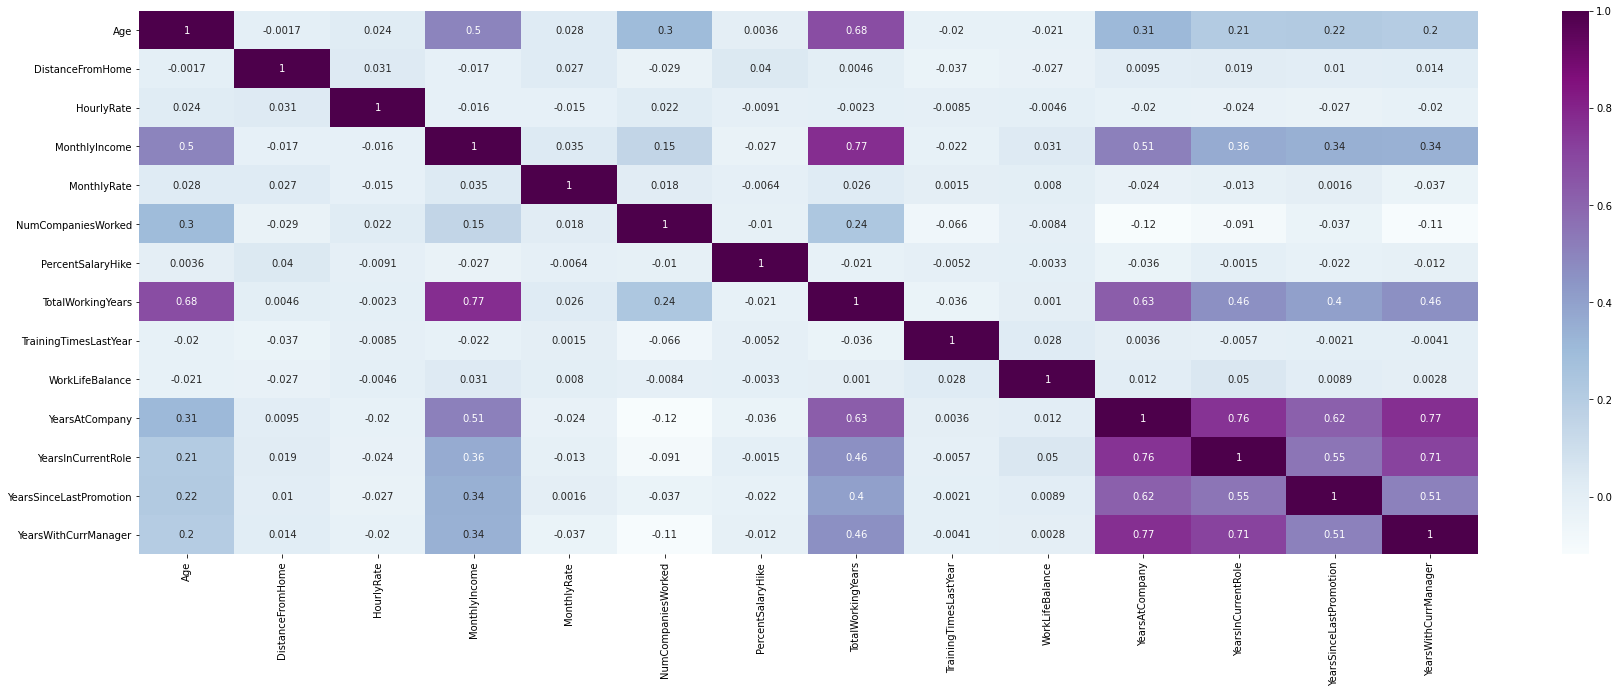

In [8]:
plt.figure(figsize=(30,10))
dataplot = sns.heatmap(con_df.corr(method = "pearson"), annot = True, cmap="BuPu")

#### 2. Spearmann/Kendall Correlation (ordinal vs ordinal)

Assume monotonic(always increasing or always decreasing functions) relationship between the two variables 

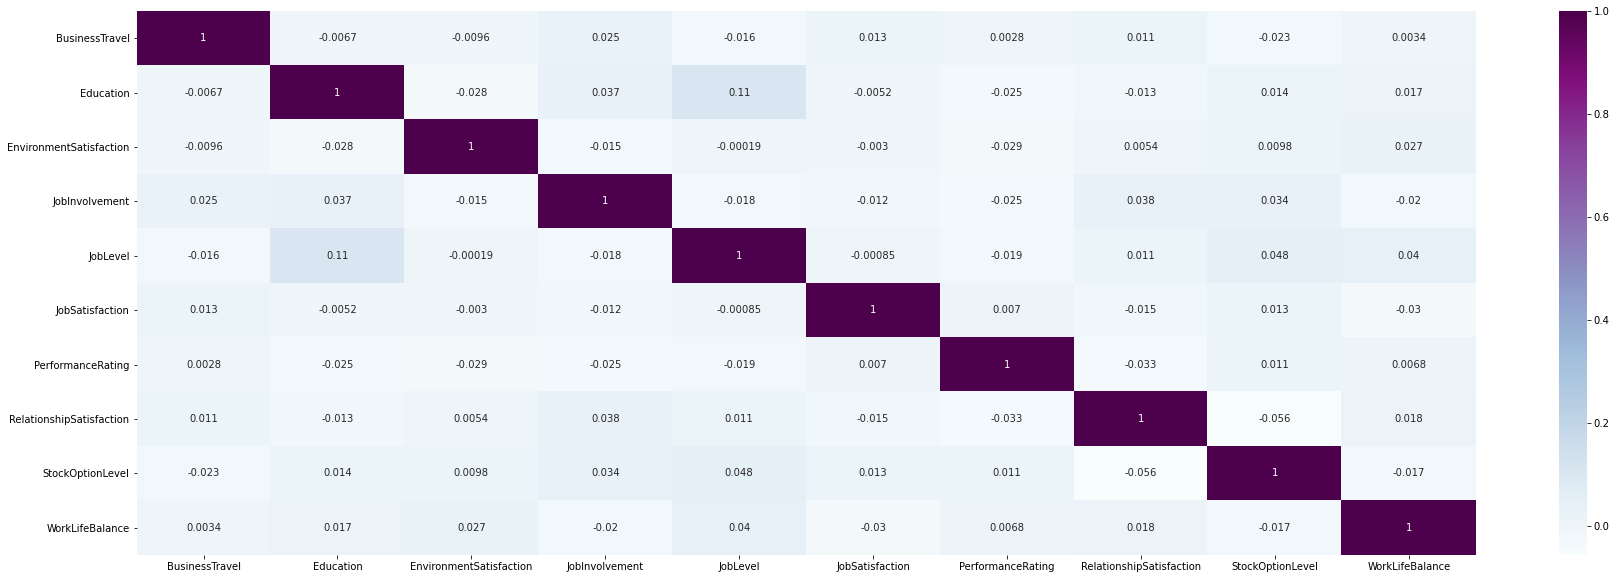

In [9]:
#Not sure if this is valuable or even correct :P
plt.figure(figsize=(30,10))
dataplot = sns.heatmap(ord_df.corr(method = "spearman"), annot = True, cmap="BuPu")

### Must implement:
1. Point Bi-Serial (one continuous vs one binary)
2. Phi-Coefficient (both binary)

## Variability (spread) of data and Outliers

Note: Maybe we should calculate bin size for each column (and construct box plot) to detect the outliers more efficiently... idk

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0F5D39160>,
      dtype=object)

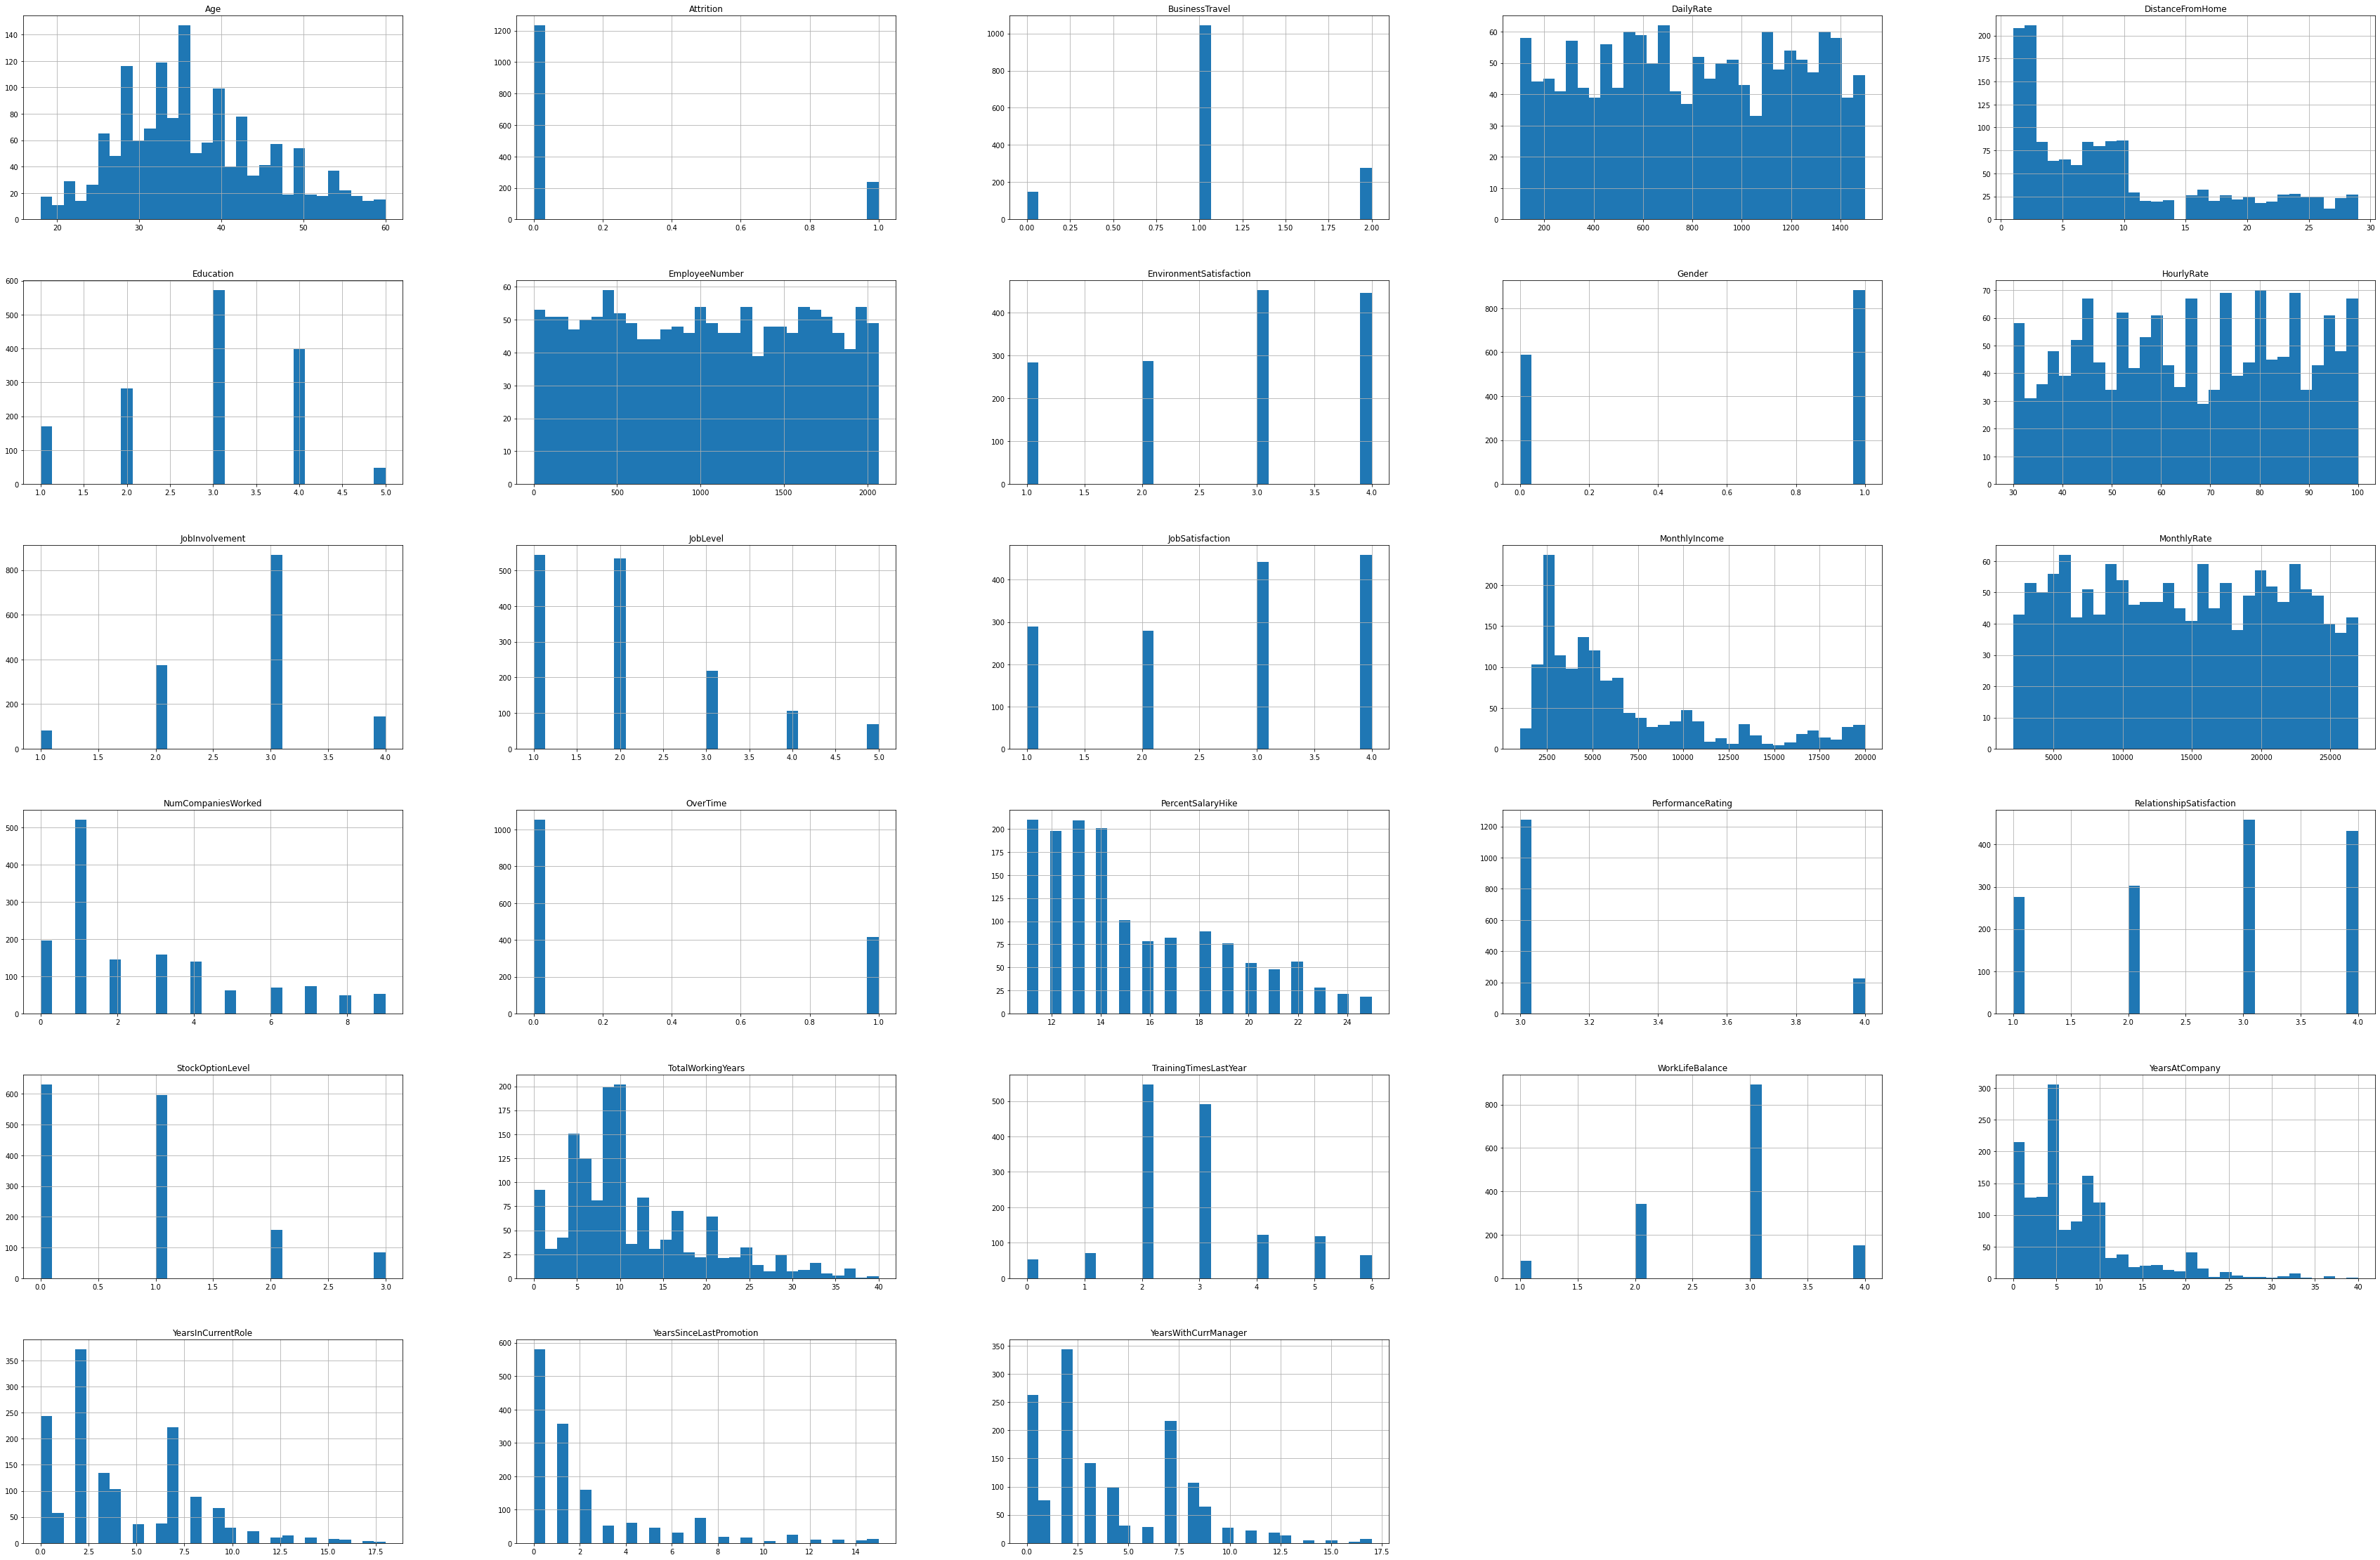

In [10]:
df.hist(bins=30, figsize=(60, 40))

In [11]:
# sns.boxplot(data=df)
# sns.boxplot(data=df["HourlyRate"])